In [ ]:
# 웹 크롤링
# - 웹 크롤러:웹문서, 이미지 등을 주기적으로 수집하여 데이터베이스화하는 프로그램
# - 크롤러가 하는 작업을 웹 크롤링이라 한다
# - requests와 beautifulsoup4 패키지를 사용

In [13]:
# 1. 웹 문서 전체 가져오기 (urllib.request 패키지)
from urllib.request import urlopen
from urllib import parse
import requests
from bs4 import BeautifulSoup as bs


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
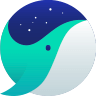
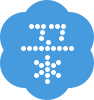

In [5]:
html = urlopen('http://www.naver.com/')
soup = bs(html, 'html.parser') #urlopen 모듈을 사용할 때는 html의 속성을 명시할 필요는 없음
print(soup)


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
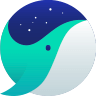
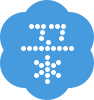

In [7]:
# 2. requests 모듈을 활용하는 방법으로 웹 문서 전체 가져오는 방법
import requests
html = requests.get('http://www.naver.com/') # 네이버의 url을 가져오는 과정
soup = bs(html.text, 'html.parser') #requests 모듈을 쓸 때는 html의 속성을 명시해야 함
print(soup)

In [ ]:
# 2. html 태크에서 원하는 정보 추출하기
# - html 태그를 이용하는 방법
# - CSS Selector를 이용하는 방법

In [ ]:
# html 태그: find('태그명'): 첫번째 태그만 검색  
# find_all('태그명'): 전체 태그를 검색하여 리스트 형식으로 반환

In [13]:
# class를 이용한 태그 검색
find_div=soup.find('div',class_="group_nav") # 네이버를 구성하는 div 태그 중 group_nav라는 클래스 가져옴
find_div

# id를 이용한 태그 검색
find_div = soup.find('div', id="NM_FAVORITE") # 네이버 중 해당 id를 이용하여 태그를 찾아옴
find_div

<div class="gnb_inner" id="NM_FAVORITE">
<div class="group_nav">
<ul class="list_nav type_fix">
<li class="nav_item">
<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
</li>
<li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>
<li class="nav_item"><a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a></li>
<li class="nav_item"><a class="nav shoplive" data-clk="svc.shoppinglive" href="https://shoppinglive.naver.com/home"><span class="blind">쇼핑LIVE</span></a></li>
<li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>
<li class="nav_item">
<a class="nav" data-clk="svc.tvcast" 

In [19]:
# find_all 사용하는 방법
find_div=soup.find('div',class_="group_nav")
find_lst = find_div.find_all('li') 
for item in find_lst:
    print(item.get_text()) # 모든 태그를 제거하고 텍스트만 남기는 거
   # print(item.text) # 태그 내 텍스트라는 속성을 출력
    print(item.find('a')['href']) # 태그의 속성을 출력한다


메일

https://mail.naver.com/
카페
https://section.cafe.naver.com/
블로그
https://section.blog.naver.com/
지식iN
https://kin.naver.com/
쇼핑
https://shopping.naver.com/
쇼핑LIVE
https://shoppinglive.naver.com/home
Pay
https://order.pay.naver.com/home

TV

https://tv.naver.com/
사전
https://dict.naver.com/
뉴스
https://news.naver.com/
증권
https://finance.naver.com/
부동산
https://land.naver.com/
지도
https://map.naver.com/
VIBE
https://vibe.naver.com/
책
https://book.naver.com/
웹툰
https://comic.naver.com/


In [ ]:
# CSS Selector를 이용하는 방법

In [27]:
css_soup=soup.select('#NM_FAVORITE > div.group_nav > ul.list_nav.type_fix') # #붙은 것은 id, div.붙은건 클래스
# 무조건 리스트 형태로 출력된다
css_a=css_soup[0].find_all('a')
for a in css_a:
    print(a.text)

메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV


In [ ]:
# 네이버 지식인에서 '선릉역'으로 검색한 뒤 검색 결과 가져오기

In [6]:
import requests
from bs4 import BeautifulSoup as bs

url = 'https://kin.naver.com/search/list.naver?query=%EC%84%A0%EB%A6%89%EC%97%AD'

html = requests.get(url) #url에서 데이터 요청
soup = bs(html.text, 'html.parser') #요청한 데이터 파싱 진행

# Css 이용한 태그 검색
ul_soup=soup.select('#s_content > div.section > ul')

# 검색된 태그에서 다시 li 전체 검색 
li_soup=ul_soup[0].find_all('li')

#검색된 li에서 원하는 텍스트 크롤링 (추출) 첫번째 데이터 갖고 오는 방법
print(li_soup[0].find('dt').get_text()) # 제목
print(li_soup[0].find('dd').get_text()) # 날짜
print(li_soup[0].select('dl > dd:nth-child(3)')[0].get_text()) # 내용 (요약)
print(li_soup[0].find_all('dd')[1].get_text())


성수동에서 지하철 타서 선릉역까지 가

2022.02.05.
성수동에서 지하철 타서 선릉역까지 가는 거로 1회용 지하철 카드? 그거 했는데... ▶ 거리비례제 요금을 말씀하신다면 - 성수역에서 선릉역은 약 11.2Km입니다.... 
성수동에서 지하철 타서 선릉역까지 가는 거로 1회용 지하철 카드? 그거 했는데... ▶ 거리비례제 요금을 말씀하신다면 - 성수역에서 선릉역은 약 11.2Km입니다.... 


In [37]:
# 1페이지 검색 결과 전체 가져오기
# - 제목, 등록일, 요약 부분을 각각 가져와서 DataFrame으로 저장하기

In [ ]:
url = 'https://kin.naver.com/search/list.naver?query=%EC%84%A0%EB%A6%89%EC%97%AD'

html = requests.get(url) #url에서 데이터 요청
soup = bs(html.text, 'html.parser') #요청한 데이터 파싱 진행
ul_soup=soup.select('#s_content > div.section > ul')

for i in range basic1

In [15]:
# 검색어를 이용한 크롤링 (1페이지에 있는 데이터만 갖고 온다.)
# - urllib 패키지의 parse

import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from urllib import parse

# 검색어 입력 받기
schtxt= input('검색어 입력:')

url = 'https://kin.naver.com/search/list.naver?query='+ parse.quote(schtxt) + '&page=1'

html = requests.get(url) #url에서 데이터 요청
soup = bs(html.text, 'html.parser') #요청한 데이터 파싱 진행

# Css 이용한 태그 검색
ul_soup=soup.select('#s_content > div.section > ul')

# 검색된 태그에서 다시 li 전체 검색 
li_soup=ul_soup[0].find_all('li')

nav_kin=[]
for li in li_soup:
    title =li.find('dt').get_text().replace("\n","")
    date = li.find_all('dd')[0].get_text()
    doct = li.find_all('dd')[1].get_text()
    #doct=li.select('dl > dd:nth-child(3)')[0].get_text()
    nav_kin.append({'제목':title, '등록일':date, '요약':doct})
    
df=pd.DataFrame(nav_kin)
df

검색어 입력:선릉역 맛집


,제목,등록일,요약
0,이전했는데 선릉역 맛집 추천...,2021.12.20.,... 괜찮은 선릉역 맛집 있으면 꼭 추천 좀 부탁드릴게요!... 중이라 선릉역 맛...
1,"선릉역 맛집 추천좀, 근처로 이사왔어요.",2020.12.06.,"... 선릉역 맛집이 많다고 들었는데, 혹시 아시는데 있으면... 선릉역 맛집으로 ..."
2,선릉역 맛집 추천,2021.06.13.,선릉역 맛집 추천
3,선릉역 맛집 어딘가요??,2020.10.04.,선릉역 맛집하면 다 농민백암왕순대라고 하는데 맞나요?? 그 맞은편 조개구이무한리필...
4,[선릉역맛집] 회사주변 회식장소로...,2020.12.06.,... ^^ 분위기 좋고 맛있는 [선릉역맛집] 함께 찾아주세요 ! 선릉역 맛집으로...
5,선릉역맛집 분위기있는곳으로...,2011.07.11.,안녕하세요 선릉역맛집중에서 분위기있고 데이트하기에... 찾고있어요 선릉역맛집들 중에...
6,선릉역 맛집,2019.10.07.,선릉역 맛집 추천좀요 농민백암왕순대
7,선릉역맛집으로 데이트 할만한 장소 ?,2012.03.01.,선릉역맛집 추천바랍니다 여자친구와 다음주 월요일이 1주년인데요 여자친구 회사가......
8,선릉역 맛집어디에 있나요?,2013.06.20.,선릉역 맛집어디에 있나요? 선릉역7번출구 첫번째골목 샤브샤브 1번출구 이탈리안 레스...
9,강남역삼동/선릉역맛집으로...,2010.09.17.,... 괜찮은 강남 역삼동/선릉역맛집을 추천해주세요 고깃집같이 한번에 들어가는 시끄...


In [11]:
# parse 모둘 사용법
from urllib import parse

text='선릉역'
enc = parse.quote(text) # 사람 언어를 컴퓨터 언어로 전환 
print(enc)

dec = parse.unquote('%EC%84%A0%EB%A6%89%EC%97%AD') #컴퓨터 언어를 사람 언어로 변환
print(dec)

%EC%84%A0%EB%A6%89%EC%97%AD
선릉역


In [1]:
### 4. 검색어 내용 전체(페이지 이동)
# - 네이버 지식인에서 검색어에 대해 10페이지까지 데이터를 뽑아내겠다

import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from urllib import parse

# 검색어 입력 받기
schtxt= input('검색어 입력:')
nav_kin=[]

for page in range(1,10): # 다른 페이지를 바꾸는 부분
    url = 'https://kin.naver.com/search/list.naver?query='+ parse.quote(schtxt) 
    url = url+ '&page=' + str(page)

    html = requests.get(url) #url에서 데이터 요청
    soup = bs(html.text, 'html.parser') #요청한 데이터 파싱 진행

    # Css 이용한 태그 검색
    ul_soup=soup.select('#s_content > div.section > ul')

    # 검색된 태그에서 다시 li 전체 검색 
    li_soup=ul_soup[0].find_all('li')
   
    for li in li_soup:
        title =li.find('dt').get_text().replace("\n","")
        date = li.find_all('dd')[0].get_text()
        doct = li.find_all('dd')[1].get_text()
        #doct=li.select('dl > dd:nth-child(3)')[0].get_text()
        nav_kin.append({'제목':title, '등록일':date, '요약':doct})

df=pd.DataFrame(nav_kin)
df

검색어 입력:제주도


,제목,등록일,요약
0,제주도 신혼여행 질문입니다.,2022.02.25.,... 신혼여행을 5월1일날 제주도로 가게되었는데 그때의 제주도 날씨는 많이 더울까...
1,제주도 호텔 숙박,2022.02.20.,제가 15살인데 제주도로 혼자 2박3일동안 갔다올생각인데 제주도 호텔에서 미성년자가...
2,제주도 스킨스쿠버 카페 추천,2022.04.09.,"제주도에서 스킨쿠버를 해보고싶은데, 체험다이빙을 할지... 모르겠어요 제주도 스킨스..."
3,제주도 3박4일 여행코스,2022.02.14.,2월 26일 3박4일로 여자친구랑 제주도 여행을 가려고 하는데 제주도를 많이 가보지...
4,제주도 여행,2022.04.10.,안녕하세요~~ 이번 5월에 제주도 태교여행을 계획하고 있는 예비맘입니당 ㅎㅎ 제주도...
...,...,...,...
85,제주도 가족여행,2022.04.04.,5월 초반에 가족들과 제주도 여행을 3박 4일로 가려 하는데요 제가 제주도를 잘 몰...
86,4월 제주도,2022.03.10.,4월에 여자친구랑 3박 4일로 제주도 여행을 가요 ! ! 여자친구가 제주도를 처음....
87,제주도렌트카 괜찮은곳 어디?,2022.02.04.,제주도렌트카 가격도 서비스도 괜찮은 곳 어디있나요? 제주도렌트카 가격이 많이 올라서...
88,제주도 백신패스,2022.01.04.,제주도 여행을 계획하고 있는데 1/3(월)일부로 백신 패스 유효 기간이 끝났습니다....
